In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.2MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data.batting_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data.bowling_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [11]:
data2.team1.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.team2.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [12]:
data2.toss_winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [13]:
data_f = data2.loc[data2.team1.isin(['Royal Challengers Bangalore','Sunrisers Hyderabad'])] 
data_f = data_f.loc[data_f.team2.isin(['Royal Challengers Bangalore','Sunrisers Hyderabad'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
431,432,2013,Bangalore,2013-04-09,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Royal Challengers Bangalore,0,7,V Kohli,M Chinnaswamy Stadium,S Ravi,SJA Taufel,NaN
480,481,2014,Bangalore,2014-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VA Kulkarni,NaN
502,503,2014,Hyderabad,2014-05-20,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,normal,0,Sunrisers Hyderabad,0,7,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,NJ Llong,NaN
524,525,2015,Bangalore,2015-04-13,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,8,DA Warner,M Chinnaswamy Stadium,RM Deshpande,RK Illingworth,NaN
567,568,2015,Hyderabad,2015-05-15,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,1,Royal Challengers Bangalore,0,6,V Kohli,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,HDPK Dharmasena,NaN
579,580,2016,Bangalore,2016-04-12,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma,NaN
602,603,2016,Hyderabad,2016-04-30,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,15,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,HDPK Dharmasena,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


**Let's do Q1 now**

SRH Wins - 8
RCB Wins - 6


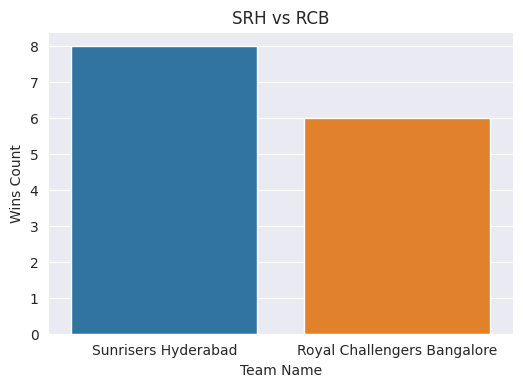

In [15]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('SRH vs RCB')
A,B =data_f.winner.value_counts()

print('SRH Wins -',A)
print('RCB Wins -',B)

plt.show()


Let's mark SRH considering our analysis

**Let's do Q2 now**

**Let's find Sandeep's economy rate and boundaries v RCB**

In [16]:
data_n = data.loc[data.bowling_team.isin(['Sunrisers Hyderabad','Royal Challengers Bangalore'])]
data_n = data_n.loc[data.batting_team.isin(['Sunrisers Hyderabad','Royal Challengers Bangalore'])]

In [17]:
data_n.bowler.unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'DW Steyn', 'GH Vihari', 'I Sharma', 'Ankit Sharma', 'NLTC Perera',
       'A Mishra', 'A Ashish Reddy', 'JD Unadkat', 'M Kartik',
       'R Vinay Kumar', 'M Muralitharan', 'TM Dilshan', 'RP Singh',
       'CL White', 'MA Starc', 'AB Dinda', 'VR Aaron', 'HV Patel',
       'KV Sharma', 'IK Pathan', 'DJG Sammy', 'Parvez Rasool',
       'Y Venugopal Rao', 'AN Ahmed', 'Yuvraj Singh', 'TA Boult',
       'P Kumar', 'RS Bopara', 'SA Abbott', 'D Wiese',
       'Mustafizur Rahman', 'AF Milne', 'KW Richardson', 'T Shamsi',
       'BB Sran', 'CH Gayle', 'Iqbal Abdulla', 'CJ Jordan', 'M Ali',
       'UT Yadav', 'TG Southee', 'Mohammed Siraj', 'C de Grandhomme',
       'Sandeep Sharma', 'Shakib Al Hasan', 'S Kaul', 'Basil Thampi',
       'P R Barman', 'Mohammad Nabi', 'S Sharma', 'V Shank

In [25]:
data_s = data_n.loc[data.bowler.isin(['Sandeep Sharma'])]

In [20]:
data_s.total_runs.sum()

62

In [21]:
data_s.match_id.nunique()

2

In [23]:
data_s.over.value_counts().sum()

50

These are 50 balls i.e 8 overs and 2 balls i.e 8.33 in decimal

In [24]:
np.round(62/8.33,2) # Average Economy rate of Sandeep v RCB

7.44

In [28]:
data_s.total_runs.value_counts()

1    20
0    18
4     5
2     5
6     2
Name: total_runs, dtype: int64

Sandeep gave 5 fours and 2 sixes in 2 matches i.e total 7 boundaries

In [29]:
np.round(7/2,2)

3.5

Let's mark less than 7.5 and less than 4 boundaries 

**For Q3, Let's evaluate the given condition**

In [30]:
data_sr = data_n.groupby(['match_id','batsman']).apply(lambda data_n:(data_n.batsman_runs.sum())).reset_index(name='Runs_Scored')
data_sr

,match_id,batsman,Runs_Scored
0,1,A Choudhary,6
1,1,BCJ Cutting,16
2,1,CH Gayle,32
3,1,DA Warner,14
4,1,DJ Hooda,16
...,...,...,...
204,11345,V Kohli,16
205,11345,V Shankar,27
206,11345,WP Saha,21
207,11345,Washington Sundar,1


In [31]:
data_sr2 = data_n.groupby(['match_id','batsman']).apply(lambda data_n:(data_n.over.value_counts().sum())).reset_index(name='Balls_Faced')
data_sr2

,match_id,batsman,Balls_Faced
0,1,A Choudhary,2
1,1,BCJ Cutting,6
2,1,CH Gayle,23
3,1,DA Warner,9
4,1,DJ Hooda,12
...,...,...,...
204,11345,V Kohli,7
205,11345,V Shankar,18
206,11345,WP Saha,11
207,11345,Washington Sundar,2


In [32]:
data_s = data_sr.join(data_sr2['Balls_Faced'])
data_s

,match_id,batsman,Runs_Scored,Balls_Faced
0,1,A Choudhary,6,2
1,1,BCJ Cutting,16,6
2,1,CH Gayle,32,23
3,1,DA Warner,14,9
4,1,DJ Hooda,16,12
...,...,...,...,...
204,11345,V Kohli,16,7
205,11345,V Shankar,27,18
206,11345,WP Saha,21,11
207,11345,Washington Sundar,1,2


In [33]:
data_s['Strike_Rate'] = (data_s['Runs_Scored']/data_s['Balls_Faced']) * 100
data_s

,match_id,batsman,Runs_Scored,Balls_Faced,Strike_Rate
0,1,A Choudhary,6,2,300.000000
1,1,BCJ Cutting,16,6,266.666667
2,1,CH Gayle,32,23,139.130435
3,1,DA Warner,14,9,155.555556
4,1,DJ Hooda,16,12,133.333333
...,...,...,...,...,...
204,11345,V Kohli,16,7,228.571429
205,11345,V Shankar,27,18,150.000000
206,11345,WP Saha,21,11,190.909091
207,11345,Washington Sundar,1,2,50.000000



Now, We have a condition of more than 3 boundaries. To score atleast 4 boundaries one needs to score 16 runs.

Also, a batsman must have played 10 balls

Let's filter out it with this condition.

In [34]:
data_s = data_s[data_s.Runs_Scored >= 16 ] # Max 16 runs to score 4 boundaries

In [35]:
data_s = data_s[data_s.Balls_Faced > 10 ] # Max 10 balls

In [36]:
data_s = data_s[data_s.Strike_Rate > 130 ] # Max Strike Rate of 130 Condition

In [37]:
data_s.head()

,match_id,batsman,Runs_Scored,Balls_Faced,Strike_Rate
2,1,CH Gayle,32,23,139.130435
4,1,DJ Hooda,16,12,133.333333
5,1,KM Jadhav,31,18,172.222222
6,1,MC Henriques,52,37,140.540541
7,1,Mandeep Singh,24,16,150.000000


In [40]:
data_s.batsman.value_counts().sum()

57

In [41]:
data_s.match_id.nunique()

14

In [43]:
np.round(57/14,2) # Average players to score with SR of 130 and hit more than 3 boundaries with atleast 10 balls faced in SRH v RCB contest

4.07

Let's mar 3-4 considering our analysis

**Let's do Q4 now**

**Let's evaluate the given condition**

In [44]:
data_n.batsman.unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'TM Dilshan', 'V Kohli',
       'KK Nair', 'MA Agarwal', 'KB Arun Karthik', 'R Vinay Kumar',
       'M Kartik', 'JD Unadkat', 'PA Reddy', 'PA Patel', 'CL White',
       'GH Vihari', 'KC Sangakkara', 'NLTC Perera', 'A Ashish Reddy',
       'DW Steyn', 'BB Samantray', 'AB de Villiers', 'AJ Finch',
       'KL Rahul', 'DJG Sammy', 'NV Ojha', 'IK Pathan', 'KV Sharma',
       'RR Rossouw', 'MA Starc', 'HV Patel', 'S Rana', 'KD Karthik',
       'SA Abbott', 'AN Ahmed', 'VR Aaron', 'KS Williamson', 'EJG Morgan',
       'SN Khan', 'Parvez Rasool', 'Bipul Sharma', 'B Kumar', 'CJ Jordan',
       'Iqbal Abdulla', 'A Hales', 'MK Pandey', 'Shakib Al Hasan',
       'YK Pathan', 'WP Saha', 'Rashid Khan', 'S Kaul', 'Sandeep Sharma',
       'M Vohra

In [45]:
data_b = data_n.loc[data.batsman.isin(['DA Warner','V Kohli','AB de Villiers','AJ Finch','KS Williamson','MK Pandey', 'WP Saha','V Shankar'])]

In [46]:
data_ba = data_b.groupby(['batsman']).apply(lambda data_b:(data_b.batsman_runs.value_counts())).reset_index(name='Runs')

In [47]:
data_ba.rename(columns = {'level_1':'Type_Run'}, inplace = True)

In [48]:
data_ba2 =  data_ba.loc[data_ba.Type_Run.isin(['4','6'])]

In [49]:
data_ba3 =  data_ba.loc[data_ba.Type_Run.isin(['1','2','3'])]

In [50]:
data_ba2.rename(columns = {'Type_Run':'4_6'}, inplace = True) 
data_ba2.rename(columns = {'Runs':'Boundaries_Count'}, inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
data_ba3.rename(columns = {'Type_Run':'1_2_3'}, inplace = True) 
data_ba3.rename(columns = {'Runs':'Boundaries_Count'}, inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
data_ba2['Boundary_Runs'] = data_ba2['4_6'] * data_ba2['Boundaries_Count']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
data_ba2.drop(['4_6','Boundaries_Count'], axis = 1)

,batsman,Boundary_Runs
2,AB de Villiers,140
3,AB de Villiers,126
7,AJ Finch,8
8,AJ Finch,6
12,DA Warner,184
14,DA Warner,186
18,KS Williamson,96
19,KS Williamson,66
24,MK Pandey,32
26,MK Pandey,12


In [54]:
data_ba4 = data_ba2.groupby(['batsman']).apply(lambda data_ba2:(data_ba2.Boundary_Runs.sum())).reset_index(name='Boundary_Runs')

In [55]:
data_ba3['1_2_3_Runs'] = data_ba3['1_2_3'] * data_ba3['Boundaries_Count']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
data_ba3.drop(['1_2_3','Boundaries_Count'], axis = 1)

,batsman,1_2_3_Runs
0,AB de Villiers,100
4,AB de Villiers,26
5,AJ Finch,8
9,AJ Finch,2
10,DA Warner,124
13,DA Warner,66
15,DA Warner,3
16,KS Williamson,90
20,KS Williamson,10
21,KS Williamson,6


In [57]:
data_ba5 = data_ba3.groupby(['batsman']).apply(lambda data_ba3:(data_ba3['1_2_3_Runs'].sum())).reset_index(name='1_2_3_Runs')

In [58]:
data_bar= data_ba4.join(data_ba5['1_2_3_Runs'])
data_bar

,batsman,Boundary_Runs,1_2_3_Runs
0,AB de Villiers,266,126
1,AJ Finch,14,10
2,DA Warner,370,193
3,KS Williamson,162,106
4,MK Pandey,44,36
5,V Kohli,326,183
6,V Shankar,24,12
7,WP Saha,22,8


In [59]:
data_ba6 = data_b.groupby(['batsman']).apply(lambda data_b:(data_b.batsman_runs.sum())).reset_index(name='Total_Runs')
data_ba6

,batsman,Total_Runs
0,AB de Villiers,392
1,AJ Finch,24
2,DA Warner,563
3,KS Williamson,268
4,MK Pandey,80
5,V Kohli,509
6,V Shankar,36
7,WP Saha,30


In [60]:
data_barf= data_bar.join(data_ba6['Total_Runs'])
data_barf

,batsman,Boundary_Runs,1_2_3_Runs,Total_Runs
0,AB de Villiers,266,126,392
1,AJ Finch,14,10,24
2,DA Warner,370,193,563
3,KS Williamson,162,106,268
4,MK Pandey,44,36,80
5,V Kohli,326,183,509
6,V Shankar,24,12,36
7,WP Saha,22,8,30



This is our desired result. Now let's use the given condition

In [61]:
data_barf['Question_Metric'] = (data_barf['Boundary_Runs'] - data_barf['1_2_3_Runs']) / data_barf['Total_Runs']
data_barf

,batsman,Boundary_Runs,1_2_3_Runs,Total_Runs,Question_Metric
0,AB de Villiers,266,126,392,0.357143
1,AJ Finch,14,10,24,0.166667
2,DA Warner,370,193,563,0.314387
3,KS Williamson,162,106,268,0.208955
4,MK Pandey,44,36,80,0.100000
5,V Kohli,326,183,509,0.280943
6,V Shankar,24,12,36,0.333333
7,WP Saha,22,8,30,0.466667


In [62]:
data_barf.sort_values(by='Question_Metric',ascending=False)

,batsman,Boundary_Runs,1_2_3_Runs,Total_Runs,Question_Metric
7,WP Saha,22,8,30,0.466667
0,AB de Villiers,266,126,392,0.357143
6,V Shankar,24,12,36,0.333333
2,DA Warner,370,193,563,0.314387
5,V Kohli,326,183,509,0.280943
3,KS Williamson,162,106,268,0.208955
1,AJ Finch,14,10,24,0.166667
4,MK Pandey,44,36,80,0.100000


Well we got the highest mentioned metric for Saha and ABD. 

Let's mark option 2 in which it was given

**Let's do Q5 now**

**Finding Wickets loss by both teams**

In [63]:
data_p = data_n.loc[data.over <=6]

In [64]:
data_p.player_dismissed.value_counts().sum()

37

In [65]:
data_p.match_id.nunique()

14

In [66]:
np.round(37/14,2) # Average Wickets lost in SRH v RCB contest

2.64

Let's mark more than 2 i.e 3 considering our analysis



Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi